## Algorytm roju cząstek (PSO - particle swarm optimization)

Inspirowany jest procesami zachodzącymi w stadach ryb bądź ptaków. Podobnie jak stado ptaków, rój podąża za przywódcą, bieżącym, najlepszym znanym rozwiązaniem, przyspieszając i zmieniając kierunek, gdy lepsze rozwiązanie zostanie znalezione. W naturze można te zachowania odnieść np. do poszukiwania jedzenia.


Zaproponowany w 1995 roku przez R.C.Eberharta (elektrotechnika) i J. Kennediego (psychologa społecznego) i pierwotnie skonstruowany do prowadzenia symulacji zachowań społecznych. W praktyce PSO i jego modyfikacje mają wiele cech wspólnych z algorytmami genetycznymi, jednak nie korzysta się w nich z operatorów genetycznych, takich jak krzyżowanie czy mutacja.

Populacja możliwych rozwiązań traktowana jest jako rój, a każdy jej element (możliwe rozwiązanie problemu) jest cząstką. Kolejne kroki algorytmu sprawiają, że cząstki przemieszczają się, symulując adaptację roju do środowiska, czyli poszukują optimum. W roju występuje lider, czyli cząstka o najlepszym położeniu. Każda cząstka ma też przypisanych sąsiadów, którzy podążają razem z nią. Każda cząstka jest więc w ruchu pod wpływem lokalnej, najlepszej pozycji lidera i kieruje się również w jego stronę. Takie zachowanie powoduje przemieszczanie cząstek w kierunku najlepszych rozwiązań. Dużą zaletą jest pamiętanie stanu poprzedniego, co pozwala na eksplorację znanej okolicy, a jednoczenie nie hamuje eksplorowania przestrzeni dalszych.

![pso_gif.gif](https://www.scottcondron.com/images/copied_from_nb/my_icons/pso_gif.gif "Source: Wikipedia")

Podstawowy algorytm PSO można sformułować w następujący sposób:
1. Losowe tworzenie próby początkowej (zbioru punktów reprezentujących cząstki) – dla każdej cząstki określone zostają położenie i prędkość początkowa.
2. Obliczenie funkcji przystosowania dla próby.
3. Wybór najlepszego rozwiązania – określenie najlepszego sąsiada oraz wytypowanie lidera roju.
4. Sprawdzenie kryterium stopu.
5. Tworzenie kolejnej próby według zdefiniowanej reguły – nowy wektor prędkości obliczany jest na podstawie parametrów cząstki, jej najlepszego sąsiada oraz lidera roju, a nowe położenie cząstki określane jest na podstawie jej parametrów (położenia oraz nowego wektora prędkości).
6. Iteracja od punktu 2.

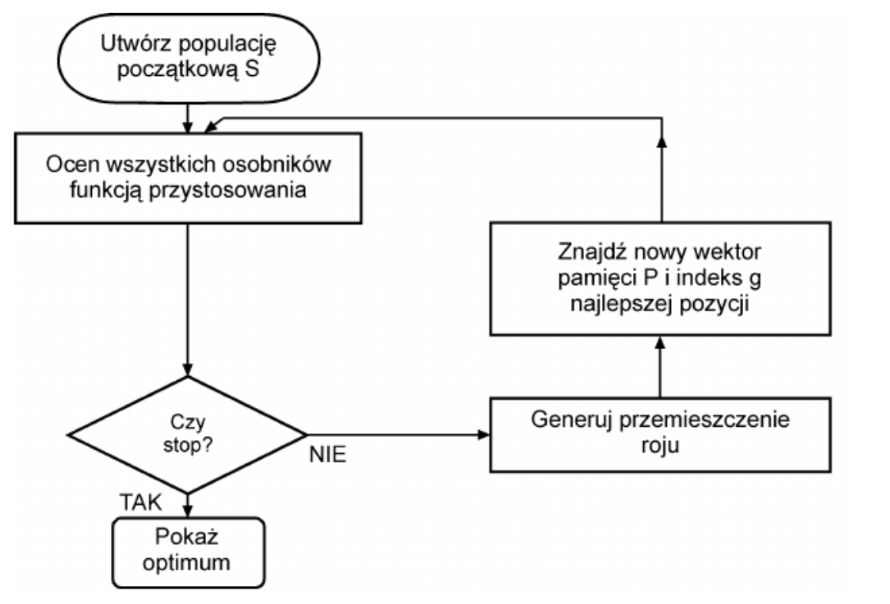

### Kilka słów o parametrach:

- `w` – współczynnik inercji (inertia weight):  
  Ten parametr kontroluje wpływ dotychczasowej prędkości cząstki na jej nową prędkość.  
  - Wysoka wartość `w` sprzyja eksploracji (cząstki przemieszczają się szerzej w przestrzeni poszukiwań).
  - Niska wartość `w` sprzyja eksploatacji (cząstki skupiają się wokół znalezionych rozwiązań).
  - Często `w` jest zmniejszane w trakcie działania algorytmu, np. liniowo lub adaptacyjnie.

- `c₁` – cognitive scaling constant (składnik poznawczy):  
  Określa wpływ najlepszej pozycji znalezionej przez daną cząstkę (`pbest`).  
  - Wyższe `c₁` zwiększa niezależność cząstek i ich tendencję do eksploracji na podstawie własnych doświadczeń.

- `c₂` – social scaling constant (składnik społeczny):  
  Określa wpływ najlepszej znanej pozycji w całym roju (`gbest`).  
  - Wyższe `c₂` powoduje, że cząstki chętniej podążają za liderem roju, co może przyspieszyć zbieżność, ale zwiększa ryzyko utknięcia w minimum lokalnym.

#### Zachowanie cząstek w skrajnych przypadkach

- `c₁ = c₂ = 0`:  
  Jeśli oba współczynniki są równe zeru (a także brak jest inercji), cząstki poruszają się z niezmienioną prędkością – ich trajektoria nie zależy ani od ich doświadczenia, ani od pozostałych cząstek. Jeśli nic ich nie zatrzyma, lecą „po linii prostej”, aż osiągną granicę przestrzeni poszukiwań.

- `c₁ > 0`, `c₂ = 0`:  
  Każda cząstka kieruje się wyłącznie swoim własnym najlepszym rozwiązaniem. Oznacza to, że są **całkowicie niezależne** – nie komunikują się ani nie wpływają na siebie nawzajem. Zbiorczo nie działają jako rój, lecz jako wiele niezależnych optymalizatorów. Taki układ sprzyja eksploracji, ale może mieć trudności z konwergencją do najlepszego wspólnego rozwiązania.

- `c₁ = 0`, `c₂ > 0`:  
  Wszystkie cząstki **ignorują własne doświadczenie** i podążają wyłącznie za najlepszym rozwiązaniem znalezionym przez cały rój. Oznacza to, że rój zachowuje się jak jedna spójna jednostka, gromadząc się wokół lidera (`gbest`). To może przyspieszyć zbieżność, ale znacząco ogranicza eksplorację – istnieje większe ryzyko utknięcia w minimum lokalnym.


**Funkcja Rastrigina** została wprowadzona przez Leonida A. Rastrigina w 1974 roku w jego pracy dotyczącej systemów automatycznej kontroli nieliniowej. Początkowo była analizowana w kontekście badania krajobrazu funkcji nieliniowych, a z czasem stała się jednym z najpopularniejszych benchmarków w dziedzinie optymalizacji.

Funkcja testowa używana w optymalizacji.

**Wzór:**
f(x) = A * n + Σ [xᵢ² - A * cos(2πxᵢ)],


gdzie A = 10, xᵢ ∈ [-5.12, 5.12]

**Cechy:**
- Globalne minimum: f(0,...,0) = 0
- Wielomodalna (dużo minimów lokalnych)
- Separowalna
- Trudna do optymalizacji (falisty krajobraz)

**Zastosowanie:**
- Testowanie algorytmów optymalizacji (GA, PSO, itd.)


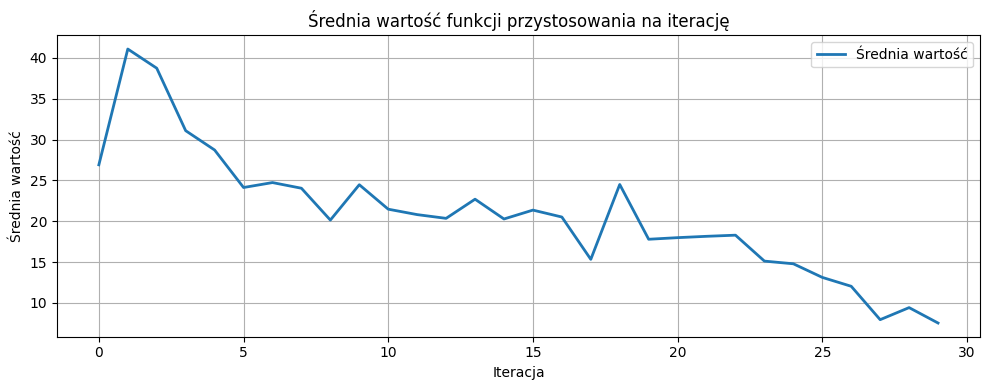

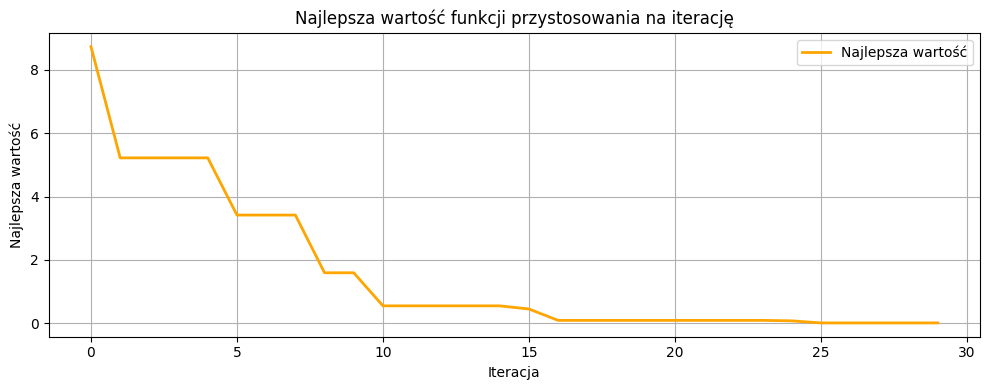

In [ ]:
!pip install -q plotly

# Import niezbędnych bibliotek
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Definicja funkcji celu – Rastrigin
def rastrigin(x):
    A = 10
    x = np.asarray(x)
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Implementacja algorytmu PSO (Particle Swarm Optimization)
def pso(cost_func, dim=2, num_particles=30, max_iter=30, w=0.5, c1=1, c2=2):
    # Inicjalizacja pozycji i prędkości cząstek
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # Inicjalizacja najlepszych znanych pozycji
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # Listy do śledzenia historii optymalizacji
    avgs = []           # średnia wartość funkcji w każdej iteracji
    bests_fitness = []  # najlepsza wartość funkcji w każdej iteracji

    # Główna pętla optymalizacji
    for i in range(max_iter):
        r1 = np.random.rand(num_particles, dim)
        r2 = np.random.rand(num_particles, dim)

        # Aktualizacja prędkości cząstek
        velocities = (
            w * velocities
            + c1 * r1 * (best_positions - particles)
            + c2 * r2 * (swarm_best_position - particles)
        )

        # Aktualizacja pozycji
        particles += velocities

        # Ocena funkcji celu
        fitness_values = np.array([cost_func(p) for p in particles])

        # Aktualizacja najlepszych pozycji lokalnych
        improved = fitness_values < best_fitness
        best_positions[improved] = particles[improved]
        best_fitness[improved] = fitness_values[improved]

        # Aktualizacja najlepszej pozycji globalnej
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

        # Zapis statystyk do historii
        avgs.append(np.mean(fitness_values))
        bests_fitness.append(swarm_best_fitness)

    return swarm_best_position, swarm_best_fitness, particles, avgs, bests_fitness

# Uruchomienie algorytmu
solution, fitness, final_particles, avgs, bests_fitness = pso(rastrigin)

# Wykres 1.
plt.figure(figsize=(10, 4))
plt.plot(avgs, label='Średnia wartość', linewidth=2)
plt.title("Średnia wartość funkcji przystosowania na iterację")
plt.xlabel("Iteracja")
plt.ylabel("Średnia wartość")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Wykres 2.
plt.figure(figsize=(10, 4))
plt.plot(bests_fitness, label='Najlepsza wartość', color='orange', linewidth=2)
plt.title("Najlepsza wartość funkcji przystosowania na iterację")
plt.xlabel("Iteracja")
plt.ylabel("Najlepsza wartość")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Przygotowanie siatki
x = np.linspace(-5.12, 5.12, 200)
y = np.linspace(-5.12, 5.12, 200)
X, Y = np.meshgrid(x, y)
Z = np.array([rastrigin([x_, y_]) for x_, y_ in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

# Wykres 3D: powierzchnia funkcji Rastrigina
surface = go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.7, name='Rastrigin')

# Cząstki z ostatniej iteracji (jako czarne punkty) - warto obrócić
particles_scatter = go.Scatter3d(
    x=final_particles[:, 0],
    y=final_particles[:, 1],
    z=[rastrigin(p) for p in final_particles],
    mode='markers',
    marker=dict(size=3, color='black'),
    name='       Cząstki (ostatnia iteracja)'
)

# Najlepsze znalezione rozwiązanie (jako czerwona kropka)
best_point = go.Scatter3d(
    x=[solution[0]],
    y=[solution[1]],
    z=[fitness],
    mode='markers',
    marker=dict(size=6, color='red'),
    name='       Najlepsze rozwiązanie'
)

# Utworzenie i konfiguracja interaktywnego wykresu 3D
fig = go.Figure(data=[surface, particles_scatter, best_point])
fig.update_layout(
    title='Funkcja Rastrigina z cząstkami PSO',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='f(x, y)'
    ),
    width=800,
    height=600
)

# Wyświetlenie wykresu
fig.show()


## Zadania do samodzielnego wykonania

1.

Proszę, korzystając z algorytmu roju cząstek znaleźć minimum funkcji

$f(x,y)= 2ln(|𝑥+0.2|+0.002)+ln(|y+0.1|+0.001)+ cos(3x)+2sin^2(3xy)+sin^2(y)-x^2-0.5y^2 $

w przedziale $𝑥, 𝑦 ∈ [-1,1]$,  


przy założeniu że rozwiązanie jest reprezentowane przez wektor [𝑥𝑖, 𝑦𝑖].

Proszę zbadać:
- funkcjonowanie algorytmu dla c1=0, c2=2
- funkcjonowanie algorytmu dla c1=2, c2=0 oraz kilku przypadków pośrednich.
- funkcjonowanie algorytmu dla c1 = c2 = 2,2
- funkcjonowanie dla różnych wartości w.


Za każdym razem należy podać średnie wyniki (wartość funkcji przystosowania) oraz odchylenie standardowe dla 10 wywołań algorytmu i przedstawić przykładowe przebiegi algorytmu na wykresach (dla jednego z wywołań).

Należy opisać, który wariant sprawdzał się najlepiej.

2.

Uzyskany najlepszy wynik proszę w miarę możliwości porównać z algorytmem genetycznym – dedykowanym dla optymalizacji tej samej funkcji. Zakładamy użycie takiej samej liczby epok dla obu algorytmów.
Należy porównać czas działania obydwu algorytmów.

## Zadania dla chętnych

3*.

Proszę obejrzeć jak działa algorytm w trybie animacji dla obydwu wspomnianych w notatniku funkcji.


http://www.alife.pl/files/opt/d/OptiVisJS/OptiVisJS.html?lang=pl
